In [1]:
import numpy as np
n = 100
a = 1.0 + np.random.normal(0, 5, n) # the intercept
x = np.random.normal(0, 2, n) # the control variable
b = 3.0 # the coefficient
y = a + b * x

In [60]:
import pandas as pd
df_term=pd.read_csv('../Data/hiring_data.csv')
df_term['Hire Date'] = pd.to_datetime(df_term['Hire Date'])
df_term['Termination Date'] = pd.to_datetime(df_term['Termination Date'])

df_term['Hire Date Month'] = pd.to_datetime(df_term['Hire Date']).dt.to_period('M')
df_term['Termination Date Month'] = pd.to_datetime(df_term['Termination Date']).dt.to_period('M')

df_term['Hire Date Year'] = pd.to_datetime(df_term['Hire Date']).dt.to_period('Y')
df_term['Termination Date Year'] = pd.to_datetime(df_term['Termination Date']).dt.to_period('Y')

df_term['Full Name']=df_term['First Name'] + '' + df_term['Last Name']

df_hire=pd.read_csv('../Data/turnover_data.csv')


df_hire['Hire Date'] = pd.to_datetime(df_hire['Hire Date'])
df_hire['Hire Date Month'] = pd.to_datetime(df_hire['Hire Date']).dt.to_period('M')



time_series_term=df_term.groupby('Termination Date Month')['Full Name'].count()


time_series_hires=df_term.groupby('Hire Date Month')['Full Name'].count()


time_series_hires=df_hire.groupby('Hire Date Month')['Legal Name'].count()

df_unemployment=pd.read_csv('../Data/umemployment.csv')
df_unemployment.head
df_unemployment.columns  

df_unemployment['DATE'] = pd.to_datetime(df_unemployment['DATE'])
df_unemployment['DATE Month'] = pd.to_datetime(df_unemployment['DATE']).dt.to_period('M')
df_unemployment.set_index('DATE Month',inplace=True)


df_claims=pd.read_csv('../Data/Number_of_claims.csv')
df_claims['DATE Month'] = pd.to_datetime(df_claims['DATE']).dt.to_period('M')
df_claims.set_index('DATE Month',inplace=True)
time_series_claims=df_claims.groupby('DATE Month')['CCSA'].sum()

In [61]:
full_time_series_df_non_un=pd.merge(time_series_term,time_series_hires,how='outer',left_index=True, right_index=True)
full_time_series_df_non_un_1=pd.merge(full_time_series_df_non_un,df_unemployment,how='outer',left_index=True, right_index=True)
full_time_series_df=pd.merge(full_time_series_df_non_un_1,time_series_claims,how='outer',left_index=True, right_index=True)
full_time_series_df.fillna(0,inplace=True)
full_time_series_df.columns=['termination','hires','date','unemployment','claims']

In [62]:
full_time_series_df.head()

,termination,hires,date,unemployment,claims
Termination Date Month,,,,,
2018-04,16,0.0,2018-04-01,4.0,7253000
2018-05,31,4.0,2018-05-01,3.8,6987000
2018-06,21,8.0,2018-06-01,4.0,8670000
2018-07,26,7.0,2018-07-01,3.8,6998000
2018-08,25,8.0,2018-08-01,3.8,6895000


In [63]:
full_time_series_df.shape

(25, 5)

In [120]:
import numpy as np
full_time_series_df['hires'].describe()

count    25.000000
mean     10.680000
std       7.168914
min       0.000000
25%       5.000000
50%       9.000000
75%      14.000000
max      27.000000
Name: hires, dtype: float64

In [260]:
nobs = 5
df_pre, df_post = full_time_series_df[0:nobs], full_time_series_df[nobs:]

# Check size
print(df_pre.shape)  # (119, 8)
print(df_post.shape)  # (4, 8)

(5, 5)
(20, 5)


In [261]:
nobs = 4
df_train, df_test = df_post[0:-nobs], df_post[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(16, 5)
(4, 5)


In [275]:
nobs = 4
df_train, df_test = full_time_series_df[0:-nobs], full_time_series_df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(21, 5)
(4, 5)


In [276]:
from pydlm import dlm, trend, dynamic,seasonality,autoReg
y=df_train['hires']
x=df_train['termination']
x1=df_train['unemployment']
x2=df_train['claims']
mydlm = dlm(y)
mydlm = mydlm + trend(degree=0, discount=0.98, name='a', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x1], discount=1, name='c', w=10.0)
#mydlm = mydlm + dynamic(features=[[v] for v in x2], discount=1, name='d', w=10.0)
mdlm = mydlm + seasonality(4, name='4day', w=1.0)
#mydlm = mydlm + autoReg(degree=3, data=full_time_series_df, name='ar3', w=1.0)

In [67]:
from pydlm import dlm, trend, dynamic,seasonality,autoReg
y=full_time_series_df['hires']
x=full_time_series_df['termination']
x1=full_time_series_df['unemployment']
x2=full_time_series_df['claims']
mydlm = dlm(y)
mydlm = mydlm + trend(degree=0, discount=0.98, name='a', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x1], discount=1, name='c', w=10.0)
#mydlm = mydlm + dynamic(features=[[v] for v in x2], discount=1, name='d', w=10.0)
mdlm = mydlm + seasonality(4, name='4day', w=1.0)
#mydlm = mydlm + autoReg(degree=3, data=full_time_series_df, name='ar3', w=1.0)

In [277]:
mydlm.evolveMode('independent')

In [278]:
mydlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


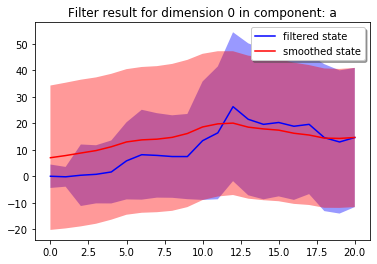

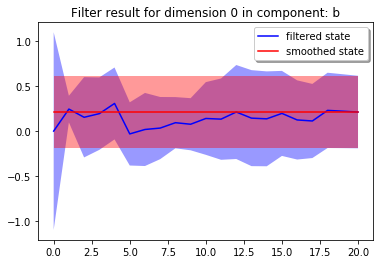

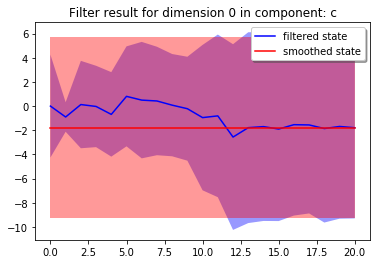

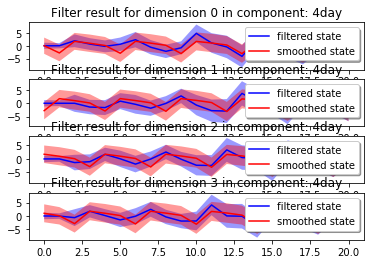

In [279]:
mydlm.turnOff('predict')
mydlm.plotCoef(name='a')
mydlm.plotCoef(name='b')
mydlm.plotCoef(name='c')
#mydlm.plotCoef(name='d')
mydlm.plotCoef(name='4day')

In [280]:
# get the smoothed results
smoothedResult = mydlm.getMean(filterType='backwardSmoother')
smoothedVar = mydlm.getVar(filterType='backwardSmoother')
smoothedCI = mydlm.getInterval(filterType='backwardSmoother')

# get the coefficients
coef_a = mydlm.getLatentState(filterType='backwardSmoother', name='a')
coef_a_var = mydlm.getLatentCov(filterType='backwardSmoother', name='a')
coef_b = mydlm.getLatentState(filterType='backwardSmoother', name='b')
coef_b_var = mydlm.getLatentCov(filterType='backwardSmoother', name='b')
coef_c = mydlm.getLatentState(filterType='backwardSmoother', name='c')
coef_c_var = mydlm.getLatentCov(filterType='backwardSmoother', name='c')
#coef_c = mydlm.getLatentState(filterType='backwardSmoother', name='d')
#coef_c_var = mydlm.getLatentCov(filterType='backwardSmoother', name='d')

In [281]:
df_test

,termination,hires,date,unemployment,claims
Termination Date Month,,,,,
2020-01,26,7.0,2020-01-01,3.6,6951000
2020-02,21,4.0,2020-02-01,3.5,8519000
2020-03,17,3.0,2020-03-01,4.4,13991000
2020-04,14,3.0,2020-04-01,14.7,68391000


In [282]:
mydlm_mse = mydlm.getMSE()
mydlm_mse

52.23248153613347

In [283]:
newData = {'b': df_test['termination'],'c': df_test['unemployment']}
(predictMean, predictVar) = mydlm.predictN(N=4, date=mydlm.n-1, featureDict=newData)

In [284]:
predictMean

[10.646991917690542,
 14.395889234421869,
 11.454231081127727,
 -8.386431387909166]

In [256]:
mean_with_simple_test_train=predictMean

In [271]:
mean_with_restricted_test_train=predictMean

In [272]:
final_frame_early=pd.DataFrame({'actual_values':df_test['hires'],'all_data_unemployment':mean_with_simple_test_train,'post_september':mean_with_restricted_test_train,'just_unemployment':just_unemployment,'just_unemployment_prev':just_unemployment_prev})

In [273]:
final_frame_early.to_csv('forecast_previous_new.csv')

In [274]:
final_frame_early.head()

,actual_values,all_data_unemployment,post_september,just_unemployment,just_unemployment_prev
Termination Date Month,,,,,
2020-01,7.0,10.646992,11.031785,9.346327,8.447889
2020-02,4.0,14.395889,13.727915,13.701209,12.838892
2020-03,3.0,11.454231,12.538621,13.066943,15.014797
2020-04,3.0,-8.386431,13.620313,3.813404,31.332640


In [286]:
all_data_term=[11,15,12,0]
post_w_vars=[12,14,13,14]

In [197]:
final_frame_early.columns

Index(['actual_values', 'all_data_unemployment', 'post_september',
       'just_unemployment', 'just_unemployment_prev'],
      dtype='object')

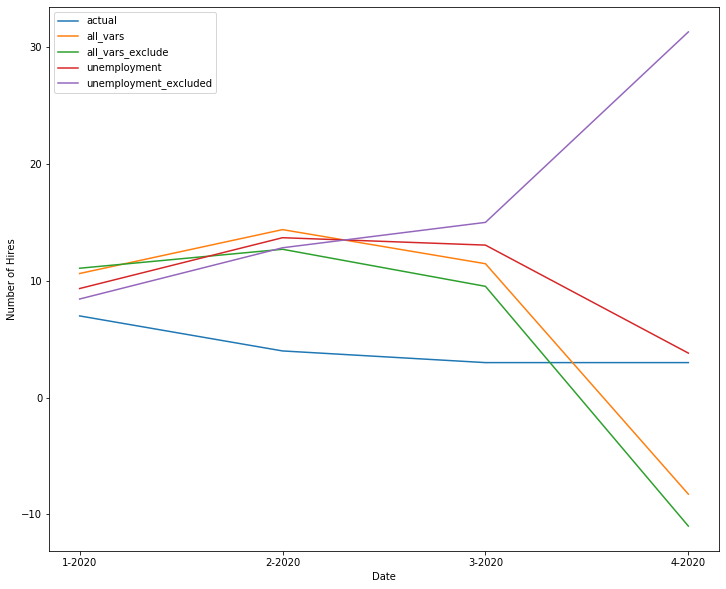

In [233]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(12,10))
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020'],final_frame_early['actual_values'],label='actual')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020'],final_frame_early['all_data_unemployment'], label='all_vars')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020'], final_frame_early['post_september'],label='all_vars_exclude')

plt.xlabel("Date")
plt.ylabel("Number of Hires")
plt.legend()
plt.savefig('early_forecasts.png')

In [119]:
df_test['hires']

Termination Date Month
2020-01    7.0
2020-02    4.0
2020-03    3.0
2020-04    3.0
Freq: M, Name: hires, dtype: float64

In [73]:
df_test['hires']
df_test['predictions']=predictMean

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [74]:
import plotly.express as px

fig = px.line(df_test, y="hires")
fig.show()

In [75]:
fig = px.line(df_test, y="predictions")
fig.show()

In [42]:
predictVar

[41.04477801082703, 40.82288429887886, 37.36101452537603, 47.21360097348544]

In [77]:
df_unemployment=pd.read_csv('../Data/unemployment_test_data.csv')
df_unemployment.head
df_unemployment.columns  



Index(['Date', 'unemployment_test'], dtype='object')

In [78]:
df_unemployment['Date'] = pd.to_datetime(df_unemployment['Date'])
df_unemployment['DATE Month'] = pd.to_datetime(df_unemployment['Date']).dt.to_period('M')
df_unemployment.set_index('DATE Month',inplace=True)

In [79]:
df_unemployment

,Date,unemployment_test
DATE Month,,
2020-05,2020-05-01,15.333333
2020-06,2020-06-01,16.000000
2020-07,2020-07-01,14.566667
2020-08,2020-08-01,13.133333
2020-09,2020-09-01,11.700000


In [182]:
#this is run before to ensure all values are occur after 9-1-18
nobs = 5
df_pre, df_post = full_time_series_df[0:nobs], full_time_series_df[nobs:]

# Check size
print(df_pre.shape)  # (119, 8)
print(df_post.shape)  # (4, 8)

(5, 5)
(20, 5)


In [183]:
nobs = 4
df_train, df_test = df_post[0:-nobs], df_post[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(16, 5)
(4, 5)


In [168]:
#run this for a regular run through 
nobs = 4
df_train, df_test = full_time_series_df[0:-nobs], full_time_series_df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(21, 5)
(4, 5)


In [91]:
from pydlm import dlm, trend, dynamic,seasonality,autoReg
y=full_time_series_df['hires']
x=full_time_series_df['termination']
x1=full_time_series_df['unemployment']
mydlm = dlm(y)
mydlm = mydlm + trend(degree=0, discount=0.98, name='a', w=10.0)
#mydlm = mydlm + dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x1], discount=1, name='c', w=10.0)
mdlm = mydlm + seasonality(4, name='4day', w=1.0)
#mydlm = mydlm + autoReg(degree=3, data=full_time_series_df, name='ar3', w=1.0)

In [184]:
from pydlm import dlm, trend, dynamic,seasonality,autoReg
y=df_post['hires']
x=df_post['termination']
x1=df_post['unemployment']
mydlm = dlm(y)
mydlm = mydlm + trend(degree=0, discount=0.98, name='a', w=10.0)
#mydlm = mydlm + dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x1], discount=1, name='c', w=10.0)
mdlm = mydlm + seasonality(4, name='4day', w=1.0)
#mydlm = mydlm + autoReg(degree=3, data=full_time_series_df, name='ar3', w=1.0)

In [185]:
from pydlm import dlm, trend, dynamic,seasonality,autoReg
y=df_train['hires']
x=df_train['termination']
x1=df_train['unemployment']
mydlm = dlm(y)
mydlm = mydlm + trend(degree=0, discount=0.98, name='a', w=10.0)
#mydlm = mydlm + dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x1], discount=1, name='c', w=10.0)
mdlm = mydlm + seasonality(4, name='4day', w=1.0)
#mydlm = mydlm + autoReg(degree=3, data=full_time_series_df, name='ar3', w=1.0)

In [186]:
mydlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [187]:
# get the smoothed results
smoothedResult = mydlm.getMean(filterType='backwardSmoother')
smoothedVar = mydlm.getVar(filterType='backwardSmoother')
smoothedCI = mydlm.getInterval(filterType='backwardSmoother')

# get the coefficients
coef_a = mydlm.getLatentState(filterType='backwardSmoother', name='a')
coef_a_var = mydlm.getLatentCov(filterType='backwardSmoother', name='a')
#coef_b = mydlm.getLatentState(filterType='backwardSmoother', name='b')
#coef_b_var = mydlm.getLatentCov(filterType='backwardSmoother', name='b')
coef_c = mydlm.getLatentState(filterType='backwardSmoother', name='c')
coef_c_var = mydlm.getLatentCov(filterType='backwardSmoother', name='c')

In [188]:
mydlm_mse = mydlm.getMSE()
mydlm_mse

69.43665968634023

In [189]:
df_test['unemployment']

Termination Date Month
2020-01     3.6
2020-02     3.5
2020-03     4.4
2020-04    14.7
Freq: M, Name: unemployment, dtype: float64

In [190]:
newData = {'c': df_test['unemployment']}
(predictMean, predictVar) = mydlm.predictN(N=4, date=mydlm.n-1, featureDict=newData)

In [191]:
predictMean

[8.447888889177914, 12.838891735540859, 15.014797111406946, 31.33264039670898]

In [192]:
just_unemployment_prev=predictMean

In [90]:
mean_post_september_2018=predictMean

In [98]:
mean_post_september_2018

[-1.6716708814130143,
 1.4860079729543854,
 2.72761752202394,
 3.694877330708535,
 -0.0752637783876473]

In [97]:
mean_post_april_2018=predictMean

In [99]:
mean_post_april_2018

[-0.5675683314896585,
 2.4566275177799994,
 3.1981390840370008,
 3.290247341622435,
 0.9308565818844583]

In [86]:
plot_hires=[0,3,4,4]
df_unemployment['unemployment_test']
import plotly.express as px

fig = px.line(df_unemployment, y="unemployment_test")
fig.show()

In [87]:
df_unemployment['predictions']=predictMean

In [88]:
fig = px.line(df_unemployment, y="predictions")
fig.show()

In [50]:
predictVar

[59.82099766801049, 63.817756743478924, 55.32240547846844, 42.06428309868177]

In [101]:
final_frame=pd.DataFrame({'actual_values':df_unemployment['unemployment_test'],'all_data_unemployment':mean_post_april_2018,'post_september':mean_post_september_2018})

In [105]:
final_frame.head()

,actual_values,all_data_unemployment,post_september
DATE Month,,,
2020-05,15.333333,-0.567568,-1.671671
2020-06,16.000000,2.456628,1.486008
2020-07,14.566667,3.198139,2.727618
2020-08,13.133333,3.290247,3.694877
2020-09,11.700000,0.930857,-0.075264


In [ ]:
['1-2020', '2-2020', '3-2020', '4-2020','5-2020', '6-2020', '7-2020', '8-2020','9-2020']

In [299]:
all_data=[10,14,14,4,0,3,4,4,1]
post=[9,13,16,32,2,2,3,4,0]

all_data_term=[11,15,12,0,np.nan,np.nan,np.nan,np.nan,np.nan]
post_w_vars=[12,14,13,14,np.nan,np.nan,np.nan,np.nan,np.nan]

var_model=[10,13,12,12,np.nan,np.nan,np.nan,np.nan,np.nan]


df_forecast_values=pd.DataFrame({'includes unemployment':all_data,'includes unemployment post':post,'includes term':all_data_term,'includes term post':post_w_vars,'VAR model':var_model})

In [300]:
df_forecast_values

,includes unemployment,includes unemployment post,includes term,includes term post,VAR model
0,10,9,11.0,12.0,10.0
1,14,13,15.0,14.0,13.0
2,14,16,12.0,13.0,12.0
3,4,32,0.0,14.0,12.0
4,0,2,NaN,NaN,NaN
5,3,2,NaN,NaN,NaN
6,4,3,NaN,NaN,NaN
7,4,4,NaN,NaN,NaN
8,1,0,NaN,NaN,NaN


In [301]:
df_forecast_values.to_csv('forecast_data_frame.csv')

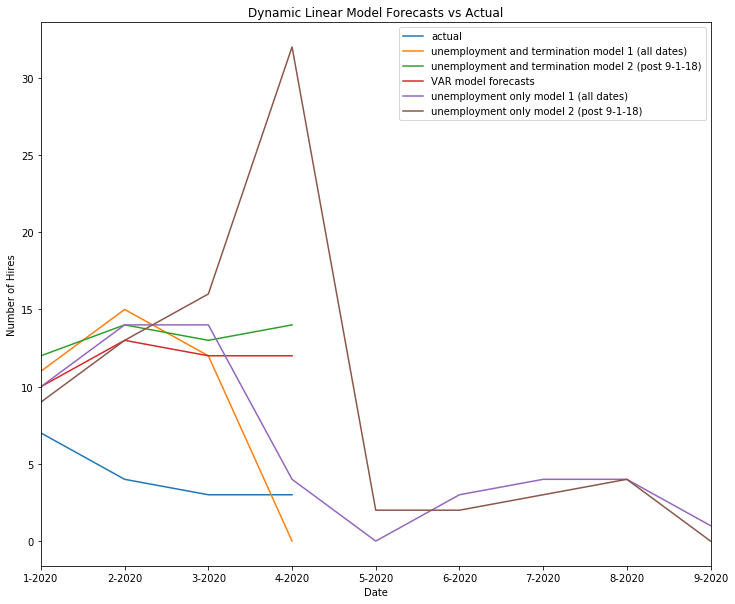

In [292]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(12,10))
#plt.plot(['5-2020', '6-2020', '7-2020', '8-2020','9-2020'],final_frame['actual_values'],label='actual')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020'],final_frame_early['actual_values'],label='actual')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020'],all_data_term, label='unemployment and termination model 1 (all dates)')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020'], post_w_vars,label='unemployment and termination model 2 (post 9-1-18)')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020'], var_model,label='VAR model forecasts')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020','5-2020', '6-2020', '7-2020', '8-2020','9-2020'],all_data, label='unemployment only model 1 (all dates)')
plt.plot(['1-2020', '2-2020', '3-2020', '4-2020','5-2020', '6-2020', '7-2020', '8-2020','9-2020'], post,label='unemployment only model 2 (post 9-1-18)')
plt.xlabel("Date")
plt.ylabel("Number of Hires")
plt.title("Dynamic Linear Model Forecasts vs Actual")
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('final_forecasts.png')


In [108]:
final_frame.to_csv('forecasts_all_models_through_September.csv')